### 3) On the Handwritten dataset attached, evaluate the bayes classifier with naive bayes assumption. You may rescale the pixel values to 0,1. As described in class, split the dataset randomly to 80:20 to training and test dataset. (By implementing your own naive bayes classifier)

In [ ]:
# Importing libraries and important modules
import numpy as np
import seaborn as sns
from sklearn import *
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the data from the csv file
dataset = np.loadtxt("A_Z Handwritten Data.csv", delimiter=",")

In [ ]:
# Storing the labels of the datapoints
labels = np.ndarray.flatten(np.hsplit(dataset,[1,785])[0])

# Normalising the data
non_scaled_features = np.hsplit(dataset,[1,785])[1]
features = (non_scaled_features/128).astype(int)

In [ ]:
# Splitting the data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,random_state=1090)

In [ ]:
# Defining the list of all alphabet numbers in training set (Ny and class_cond_P)
Ny = [len(X_train[y_train == yi]) for yi in range(26)]
class_cond_P = {y : {i : 0 for i in range(784)} for y in range(26)}

In [ ]:
# Storing the priors of all alphabet [index 0 - 25] in a list.
Prior_of_all_alphabet = []
def Prior_Probability(X_train, Y_train):
    N = len(X_train)  # Total number of rows in dataset
    for alphabet in range(26) :  
        Prior_alphabet = sum(Y_train == alphabet) / N   # prior probability P(Y=y) for y in {0,1,2,...,25}
        Prior_of_all_alphabet.append(Prior_alphabet)
    return Prior_of_all_alphabet

In [ ]:
# Initialising the Class Conditional probability and Total sample points for the alphabets respective to their features
class_conditional_probabilty_of_alphabet = {alphabet : {cell : 0 for cell in range(784)} for alphabet in range(26)} 
Total_sample_points_corresponding_to_alphabet = [len(X_train[y_train == alphabet]) for alphabet in range(26)]

In [ ]:
# Definition of Class Conditional Probability
def class_conditional_probabilities(X_train, Y_train):
    # Class conditional Densities P(Xi = 1 | Y = y) calculations for y in {0,1,...,25} and i in {0,1,2,...,783}
    # Note : P(Xi = 0 | Y = y) = 1 - P(Xi = 1 | Y=y) so we will only store P(Xi = 1 | Y= y)
    for alphabet in range(26):
        # X's where true label is y
        True_label_of_X = X_train[ Y_train == alphabet]
        # no. of samples in class Y = y in given Dataset
        Total_sample_of_alphabet_y = Total_sample_points_corresponding_to_alphabet[alphabet]      
        for i in range(784) : 
          # We have applied LAPLACIAN SMO0THING to tackle the problem of zero probability in Naive Bayes ML Algorithm
          class_conditional_probabilty_of_alphabet[alphabet][i] = (sum([True_label_of_X[j][i] == 1 for j in range(len(True_label_of_X))]) + 1 ) / (Total_sample_of_alphabet_y + 2) 

    return class_conditional_probabilty_of_alphabet 

In [ ]:
# Calculating Prior Probability and class conditional probabilites
Prior_Probabilty_of_alphabet = Prior_Probability(X_train, y_train)
Overall_class_conditional_Probabilty_of_all_alphabet  = class_conditional_probabilities(X_train, y_train)

In [ ]:
# Calculating posterior Q(x) = P(Y = y | X = (x0, x2, ..., x783) ) 
# P(Y = yk | X = (x0,x2,...,x783) ) = P(Y=yk) * Product ( P(X = (x0,x2,..., x783) | Y = yk) )/{ summation_(over i) ( P(Y = yi)*P(X=  (x0,x2,..., x783) |Y=yi))}
# where   yi is in {0,1,2,...,25}
#         P(X = (x0,x2,..., x783) | Y = yk) = product_(over i) ( P(Xi = xi | Y = yk))
# Posterior function Calculator
def posterior_probability(X_test) : 
    # We are calculating  P(X = (x0,x1,x2,..., x783) | Y = yk ) for k = 0,1,2,..,25
    P_x_given_y = []
    for alphabet in range(26):   
        P_x_given_yk = sum([np.log(Overall_class_conditional_Probabilty_of_all_alphabet[alphabet][i])  if X_test[i] == 1 else np.log((1 - Overall_class_conditional_Probabilty_of_all_alphabet[alphabet][i])) for i in range(784) ])
        P_x_given_y.append(P_x_given_yk)
    
    y_predictions = []
    for alphabet in range(26) : 
        P_yk_given_X = np.log(Prior_Probabilty_of_alphabet[alphabet]) + P_x_given_y[alphabet]         
        y_predictions.append(P_yk_given_X)
    y_pred = np.argmax(y_predictions)
    return y_pred

In [ ]:
# Predicting on our test data to get the desired results.
Alphabet_Predicted = []
for i in range(len(X_test)): 
    Alphabet_Predicted.append(posterior_probability(X_test[i]))

In [ ]:
# Generating the Confusion Matrix and Classification Report for the Bayes Classifier.
confMatrix = confusion_matrix(y_test, Alphabet_Predicted )
report = metrics.classification_report(y_test, np.array(Alphabet_Predicted))

In [ ]:
# Confusion Matrix of Bayes Classifier
print(confMatrix)

[[1919   60    1    2    9    0   39  144    0   17   18    0   98   69
     6   24   32   95    0    1   13    4   23   72   58    3]
 [  77 1240    5   48   29    0   20   25    1   43    1    3   14   18
    50   12   10   13   32    0    6    0    7    3   23   42]
 [   1   76 3346    8  177   10   53    5    0   36   62  225   41   31
   277   88   33    7    2   20   45    0  155    0   11    9]
 [  21   67    6 1412    0    0    2    1    0   93    0   17   16   21
   214   28   25    2   21    0   30    0   20    3    6   21]
 [  34  136   62    1 1310   37   52    1    6    5  145  113   23   29
    17   63   10   90   38   15   12    0   13    6    8   18]
 [   1    0    0    0    5  207    0    0    0    1    0    0    0    0
     0   13    0    0    0    3    0    0    1    0    2    0]
 [  13   23   23    1   17    1  836    2    1   13    4   10    4   13
    24    3   86    9   31    2   19    0   19    1    0    1]
 [  75   22    0    1    3    0    3  779    0    6    

In [ ]:
#Classification Report of the Bayes Classifier
print(report)

              precision    recall  f1-score   support

         0.0       0.63      0.71      0.67      2707
         1.0       0.46      0.72      0.56      1722
         2.0       0.85      0.71      0.77      4718
         3.0       0.54      0.70      0.61      2026
         4.0       0.70      0.58      0.63      2244
         5.0       0.35      0.89      0.50       233
         6.0       0.54      0.72      0.62      1156
         7.0       0.43      0.55      0.48      1413
         8.0       0.21      0.90      0.34       230
         9.0       0.37      0.59      0.46      1659
        10.0       0.43      0.65      0.52      1129
        11.0       0.74      0.71      0.72      2276
        12.0       0.71      0.88      0.78      2465
        13.0       0.61      0.63      0.62      3789
        14.0       0.89      0.78      0.83     11612
        15.0       0.80      0.74      0.77      3897
        16.0       0.59      0.70      0.64      1155
        17.0       0.64    

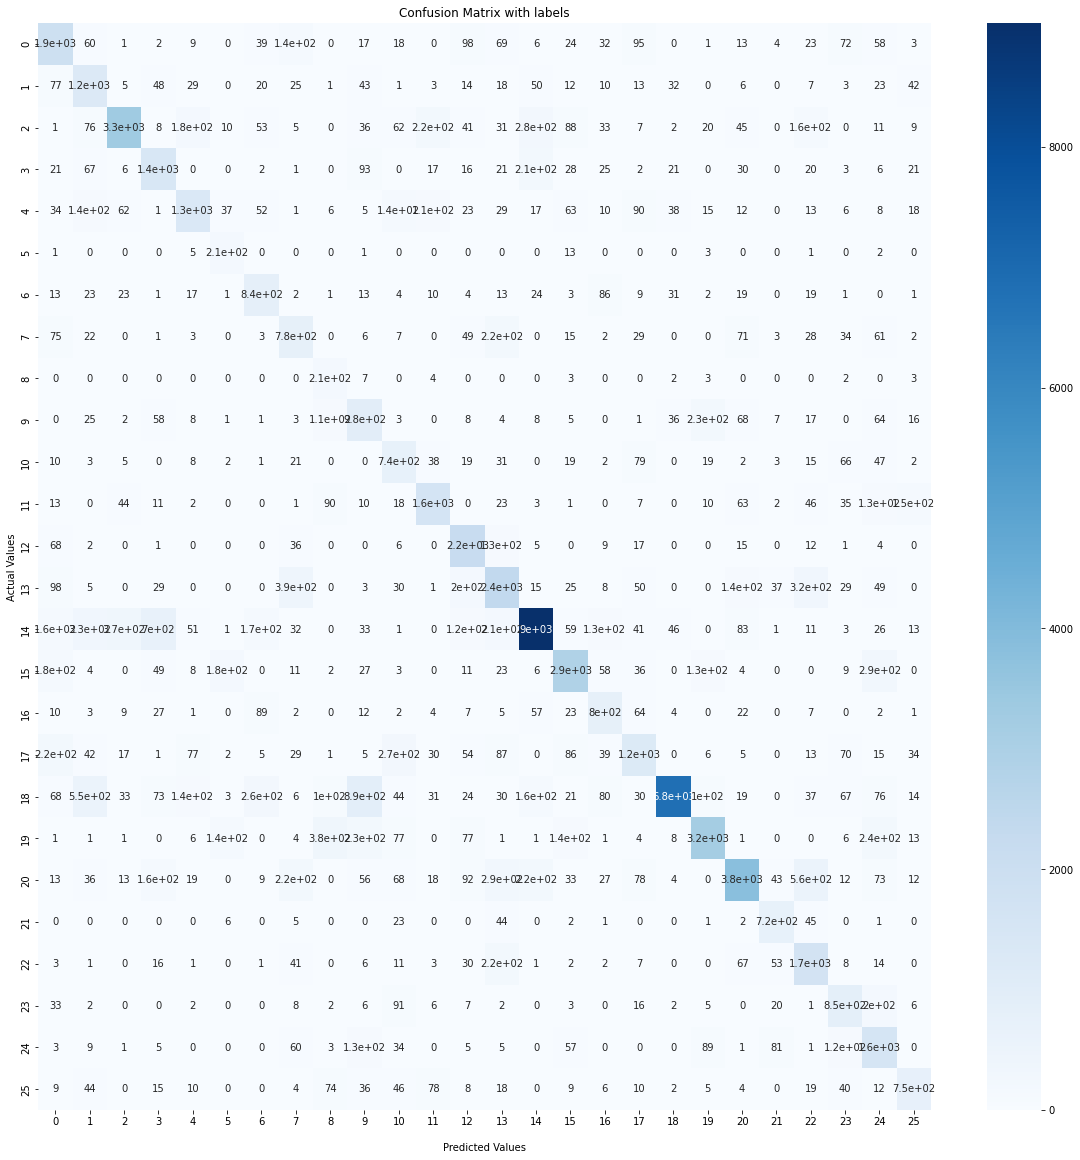

In [ ]:
# Defining the size of the image
fig, ax = plt.subplots(figsize=(20, 20))

# Seaborn Heatmap of the Confusion Matrix
ax = sns.heatmap(confMatrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

# To Display the visualization of the Confusion Matrix
plt.show() 

In [ ]:
print("Accuracy of Bayes Classifier:", metrics.accuracy_score(y_test, np.array(Alphabet_Predicted))*100,"%")

Accuracy of Bayes Classifier: 70.3937388409338 %


**Observations:**

- The Handwritten Dataset is partitioned into features and labels and the pixel values have been rescaled to 0, 1. The entire dataset has been split into 80% Training Data and 20% Test Data.

- The Bayes Classifier has been built on the Naive Bayes assumption that the predictors are independent of each other given a class. The presence of a particular feature in a class is independent of any other feature.

- The Prior Probability and Class Conditional Probabilitiy functions have been defined for the labels initially and the functions have been applied to the training data. These have been utilised for calculating the posterior probability function.

- The Model has been used to predict the outcome on the test data. The Confusion Matrix and Classification Report has been produced for the Bayes Classifier.

- The Bayes Classifier with Naive Bayes assumption evaluated on the test data produces an accuracy of close to 70.39%.

- The Confusion Matrix for the above Bayes Classifier shows the number of data points correctly classified or misclassified for each of the 26 labels.

- We observe that the diagonal of the Confusion Matrix is significantly distinct and darker indicating that the majority of the points of a particular label were correctly predicted & classified while a few of the points were misclassified as other labels.

- We have also applied **Laplacian Smoothing** in our Bayes Classifier to tackle the problem of zero probability in Naive Bayes ML Algorithm.
- We can see that the Naive Bayes Classifier works with suitable accuracy for classification on datasets with discrete features.